In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose

# from prophet import Prophet


In [12]:
df = pd.read_csv(r"Electricity usage RSA.csv")
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


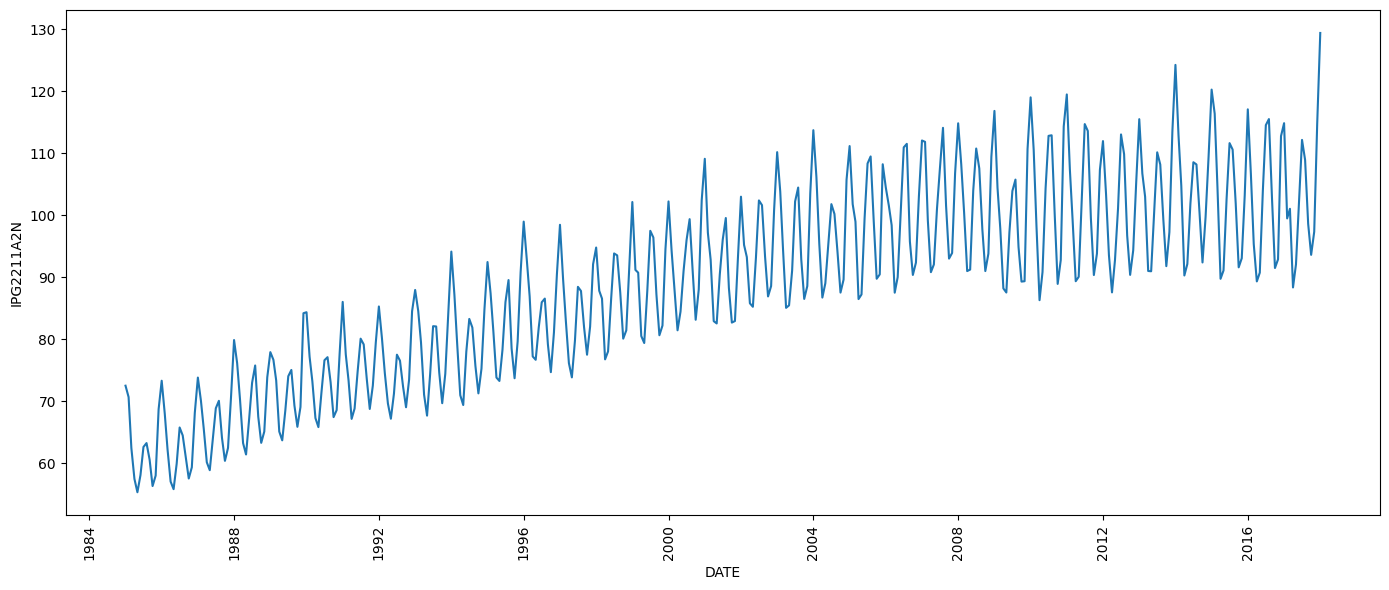

ADF Statistic: -2.0
p-value: 0.0


In [13]:
df['DATE'] = pd.to_datetime(df['DATE'], format='mixed')
df.set_index('DATE', inplace=True)

# Plot original data
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='DATE', y='IPG2211A2N')
# plt.title("Monthly Gold Prices")
# plt.ylabel("Price (USD)")
# plt.xlabel("Date")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



result = adfuller(df['IPG2211A2N'])
print(f"ADF Statistic: {np.round(result[0])}")
print(f"p-value: {np.round(result[1])}")

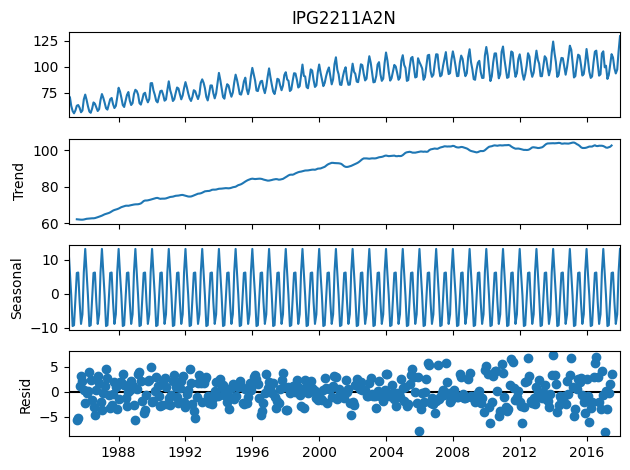

In [14]:

decomp = seasonal_decompose(df['IPG2211A2N'], model='additive', period=12)
decomp.plot()
plt.show()

This data seems to indecate a seasonality as it goes up and down on set intervals

In [15]:
from statsmodels.tsa.arima.model import ARIMA
df.index = pd.date_range(start=df.index[0], periods=len(df), freq='MS')

# Fit ARIMA model (p=5, d=1, q=2)
model = ARIMA(df['IPG2211A2N'], order=(5, 1, 2))
model_fit = model.fit()

# Summary
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:             IPG2211A2N   No. Observations:                  397
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -1046.512
Date:                Fri, 25 Apr 2025   AIC                           2109.024
Time:                        10:38:00   BIC                           2140.875
Sample:                    01-01-1985   HQIC                          2121.642
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7384      0.048     15.331      0.000       0.644       0.833
ar.L2         -1.0195      0.055    -18.607      0.000      -1.127      -0.912
ar.L3         -0.0454      0.089     -0.508      0.6

c:\Users\deanv\Desktop\Test\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
n_periods = 12
forecast = model_fit.forecast(steps=n_periods)

# Generate new monthly dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast': forecast
}).set_index('Date')


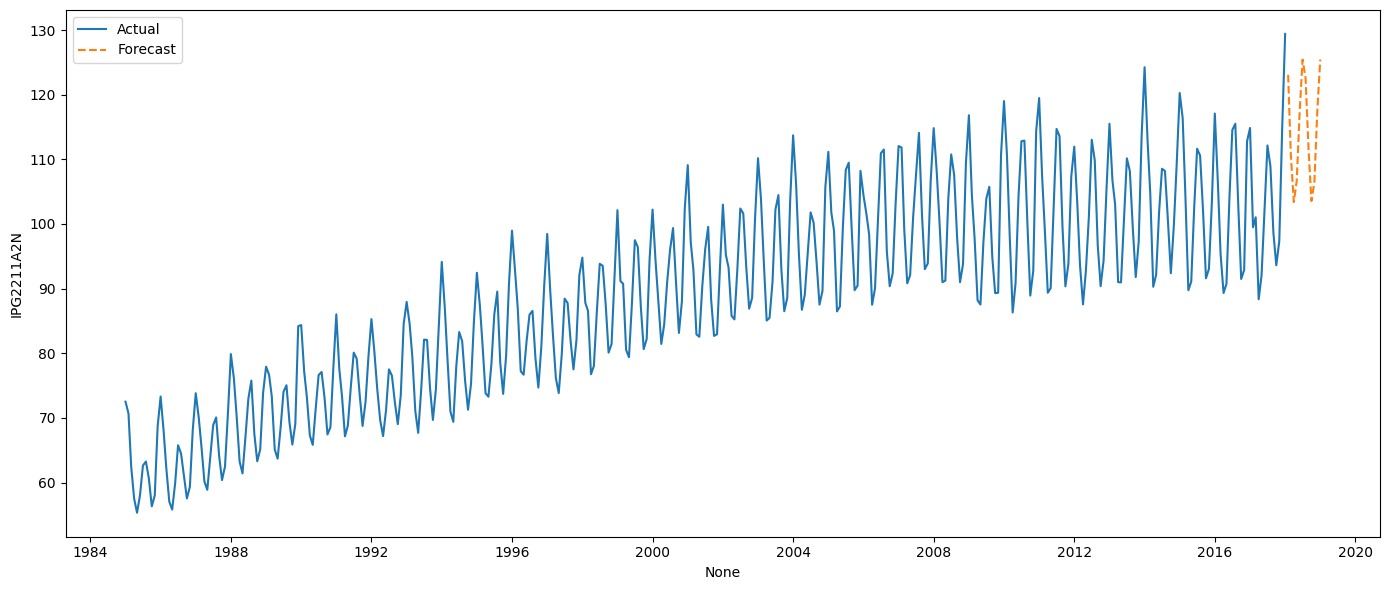

In [17]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x=df.index, y='IPG2211A2N', label='Actual')
sns.lineplot(data=forecast_df, x=forecast_df.index, y='Forecast', label='Forecast', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# yearly_avg = df.resample().mean()
# print(yearly_avg.sort_values(by='DATE', ascending=False))

TypeError: NDFrame.resample() missing 1 required positional argument: 'rule'